In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import scale

In [3]:
data = pd.read_csv('german_credit.csv')

## Feature extraction is a process of dimensionality reduction
- Principal Component Analysis (PCA) helps reduce dimensions by creating a new set of variables that are smaller than the original set without losing any information 
- This efficient reduction of the number of variables is achieved by obtaining orthogonal linear combinations of the original variables – the so-called Principal Components (PCs). 
- PCA is useful for the compression of data and to find patterns in high-dimensional data. 

## PCA doesn't improve the performance of Random Forests much because Random Forests check feature importance and builds a model based on the important features
- let's run a logistic regression model instead on the data 
- then run another logistic regression model on the data after we have reduced the number of dimensions using PCA

In [88]:
X, y = data.loc[:, data.columns != 'Creditability'], data['Creditability']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(800, 20) (800,)
(200, 20) (200,)


## run a logistic regression model on the raw data

In [90]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [92]:
## run PCA on the raw data to reduce dimensions

In [143]:
x = data.values #convert the data into a numpy array
x = scale(x);x

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.65465367, -1.25456565, -0.24085723, ..., -0.42828957,
        -0.82331789, -0.19601428],
       [ 0.65465367, -1.25456565, -0.9875727 , ...,  2.33486893,
        -0.82331789, -0.19601428],
       [ 0.65465367, -0.45902624, -0.73866754, ..., -0.42828957,
        -0.82331789, -0.19601428],
       ...,
       [-1.52752523,  1.13205258,  0.00804793, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-1.52752523, -0.45902624, -0.73866754, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-1.52752523, -1.25456565,  0.75476341, ..., -0.42828957,
        -0.82331789, -0.19601428]])

In [144]:
covar_matrix = PCA(n_components = 20) #we have 20 features

In [145]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([12.2, 22.4, 29.5, 35.9, 41.8, 47.5, 53. , 58.2, 63. , 67.4, 71.6,
       75.5, 79.2, 82.8, 86.1, 89.1, 91.8, 94.3, 96.6, 98.8])

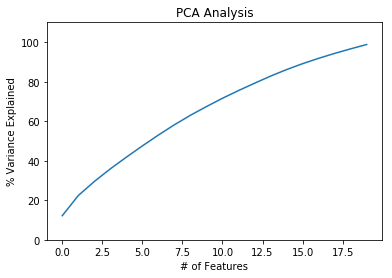

In [149]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,110)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [137]:
pca = PCA(n_components=13)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])



# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)
print("Combined space has", X_features.shape[1], "features")

Combined space has 14 features


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(800, 14) (800,)
(200, 14) (200,)


In [139]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80
